In [1]:
import os
import xml.etree.ElementTree as ET
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob


In [2]:
#use seaborn for plotting defaults
import seaborn as sns; sns.set()

In [3]:
def from_folder(folder_path):
    strokesets = []
    xml_paths = glob.glob(os.path.join(folder_path, "**/*.xml"), recursive=True)
    for xml_path in xml_paths:
        tree = ET.parse(xml_path)
        _strokesets = tree.find(".//StrokeSet")
        strokeSet = [np.array([(float(point.get("x")), float(point.get("y")), float(point.get("time")))
                               for point in stroke.findall("./Point")]) for stroke in _strokesets.findall("./Stroke")]
        strokesets.append(strokeSet)
    return strokesets

In [4]:
strokesets = from_folder("original")

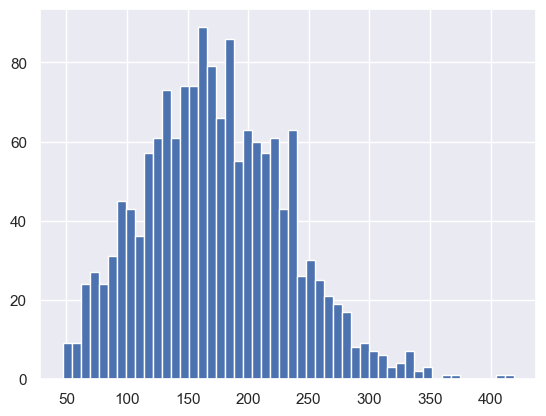

In [5]:
# make a histogram of the number of strokes per strokeset
num_strokes = [len(strokeset) for strokeset in strokesets]
plt.hist(num_strokes, bins=50)
plt.show()

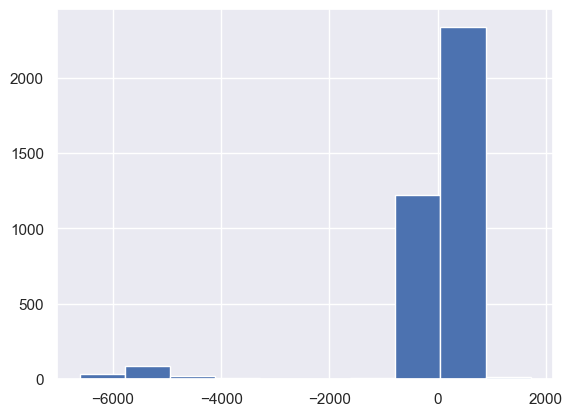

In [7]:
# Calculate gaps between strokes
gaps = []
for strokeset in strokesets[:20]:
    strokes = [np.array(stroke) for stroke in strokeset]
    starts = np.array([stroke[0] for stroke in strokes])
    ends = np.array([stroke[-1] for stroke in strokes])
    dists = starts[1:, 0] - ends[:-1, 0]
    gaps.extend(dists)

# Create the histogram with flexible bin size
plt.hist(gaps, bins=10)

# Show the plot
plt.show()


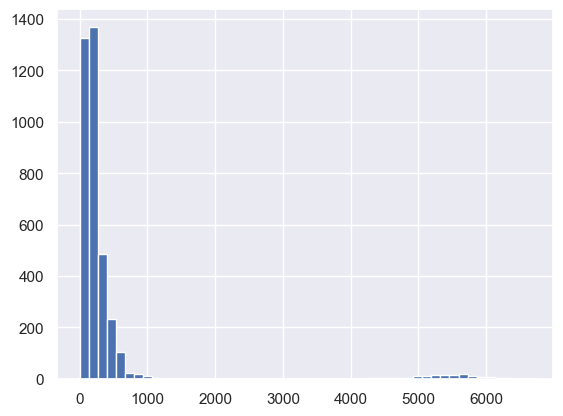

In [8]:
# Calculate gaps between strokes
gaps = []
for strokeset in strokesets[:20]:
    strokes = [np.array(stroke) for stroke in strokeset]
    starts = np.array([stroke[0] for stroke in strokes])
    ends = np.array([stroke[-1] for stroke in strokes])
    # Calculate the distances between the end of one stroke and the start of the next eucledian distance
    dists = np.sqrt(np.sum((starts[1:] - ends[:-1])**2, axis=1))
    gaps.extend(dists)

# Create the histogram with flexible bin size
plt.hist(gaps, bins=50)

# Show the plot
plt.show()

In [9]:
# split all the strokeset into lines 

def split_strokesets(strokesets, threshold=3500):
    new_strokesets = []
    for strokeset in strokesets:
        strokes = [np.array(stroke) for stroke in strokeset]
        starts = np.array([stroke[0] for stroke in strokes])
        ends = np.array([stroke[-1] for stroke in strokes])
        dists = starts[1:, 0] - ends[:-1, 0]
        split_indices = np.where(dists < -threshold)[0] + 1
        split_indices = np.concatenate(([0], split_indices, [len(strokes)]))
        split_strokes = [strokes[i:j] for i, j in zip(split_indices[:-1], split_indices[1:])]
        new_strokesets.extend(split_strokes)
    return new_strokesets


new_strokesets = split_strokesets(strokesets, 1500)
len(new_strokesets)

10939

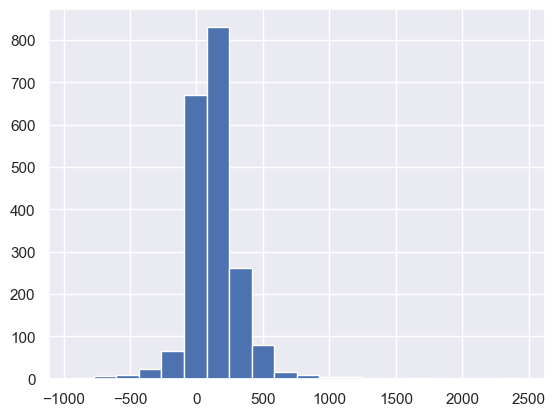

In [10]:
# Calculate gaps between strokes after splitting
gaps = []
for strokeset in new_strokesets[100:200]:
    strokes = [np.array(stroke) for stroke in strokeset]
    starts = np.array([stroke[0] for stroke in strokes])
    ends = np.array([stroke[-1] for stroke in strokes])
    dists = starts[1:, 0] - ends[:-1, 0]
    gaps.extend(dists)


# Create the histogram with flexible bin size
plt.hist(gaps, bins=20)

# Show the plot
plt.show()

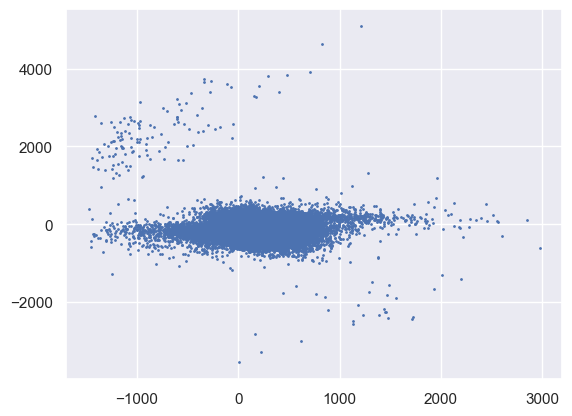

In [11]:
# calculate the gap vector for each concecutive stroke pair
gap_vectors = []
for strokeset in new_strokesets:
    strokes = [np.array(stroke) for stroke in strokeset]
    starts = np.array([stroke[0] for stroke in strokes])
    ends = np.array([stroke[-1] for stroke in strokes])
    # dist is the vector from prev end to curr start point in dx, dy coordinates
    dists = starts[1:] - ends[:-1]
    gap_vectors.append(dists)

# plot the gap vectors as points
gap_vectors = np.concatenate(gap_vectors)
plt.scatter(gap_vectors[:, 0], gap_vectors[:, 1], s=1)
plt.show()

In [14]:
# a histogram based on distance between 2 concecutive points in everystroke

# Calculate the distances between concecutive points
distances = []
for strokeset in new_strokesets:
    strokes = [np.array(stroke) for stroke in strokeset]
    for stroke in strokes:
        dists = np.sqrt(np.sum((stroke[1:] - stroke[:-1])**2, axis=1))
        distances.extend(dists)


In [22]:
len(distances)

6627606

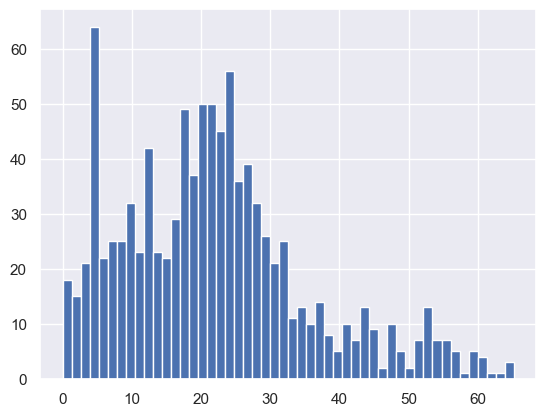

In [23]:
# histogram of the distances
plt.hist(distances[:1000], bins=50)
plt.show()

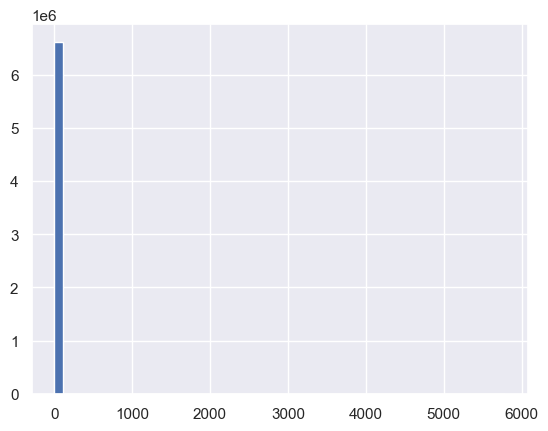

In [25]:
plt.hist(distances, bins=50)
plt.show()